In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, model_selection
from joblib import dump, load
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import gc
import pickle


pd.set_option('display.max_columns', None)

# Load data

In [2]:
df = pd.read_csv('clean_data1.csv')

df = df.drop("CODE_GENDER_M", axis = 1)

Proportion of accepted and rejected proposal

In [3]:
df["TARGET"].value_counts(normalize=True)*100

0    92.277228
1     7.722772
Name: TARGET, dtype: float64

In [4]:
for col in ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "CREDIT_MEAN_OVERDUE_active", 
 "CREDIT_MEAN_active", "CREDIT_MEAN_OVERDUE_sold", "CREDIT_MEAN_sold",
"CREDIT_MEAN_OVERDUE_closed", "CREDIT_MEAN_closed", "previous_CREDIT"]:
    df[col] = np.log10(df[col]+1)

In [5]:
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY,AGE,YEARS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,CREDIT_active,CREDIT_MEAN_OVERDUE_active,CREDIT_MEAN_active,proportion_OVERDUE_active,CREDIT_sold,CREDIT_MEAN_OVERDUE_sold,CREDIT_MEAN_sold,proportion_OVERDUE_sold,CREDIT_closed,CREDIT_MEAN_OVERDUE_closed,CREDIT_MEAN_closed,proportion_OVERDUE_closed,CREDIT_bad,CREDIT_MEAN_OVERDUE_bad,CREDIT_MEAN_bad,proportion_OVERDUE_bad,YEARS_CREDIT_ENDDATE,YEARS_ENDDATE_FACT,previous_CREDIT,Number_years_Loan_Theorical,AMT_CREDIT_ANNUITY_RATIO
0,100023,0,4.954247,4.244636,31.154427,5.595058,0.0,2.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,4.653222,0.0,0.0,0.0,0.0,0.0,1.0,3.610902,4.979426,0.042793,0.0,0.0,0.0,0.0,3.608487,-0.377823,5.055065,0.195150,31.001281
1,100309,0,5.197283,4.183825,44.194921,8.595745,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.0,4.653222,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,5.157278,0.000000,0.0,0.0,0.0,0.0,-3.989049,-6.584531,4.904467,0.096943,17.269968
2,100581,0,5.431365,4.504484,53.490734,10.704187,0.0,2.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,4.653222,0.0,0.0,0.0,0.0,0.0,1.0,3.234999,5.335875,0.007923,0.0,0.0,0.0,0.0,1.618070,-1.158111,5.308190,0.118333,26.146479
3,101486,0,5.197283,4.020796,29.990391,6.017845,21.0,2.0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,4.954247,0.0,0.0,0.0,0.0,0.0,1.0,3.219334,4.795546,0.026518,0.0,0.0,0.0,0.0,-1.237509,-1.237509,4.255297,0.066600,21.450021
4,101558,0,5.306427,4.436059,42.904598,10.487303,0.0,1.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,4.630489,0.0,0.0,0.0,0.0,0.0,1.0,2.932474,4.876582,0.011360,0.0,0.0,0.0,0.0,0.101300,-0.147844,4.783795,0.134778,35.614180


In [6]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
cat = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE" or column[:4] == "FLAG":
        cat.append(column)
    else:
        col.append(column)

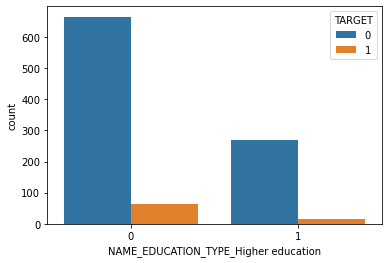

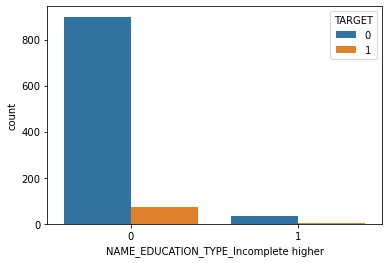

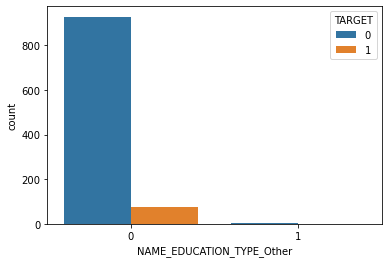

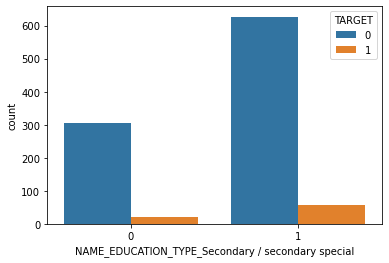

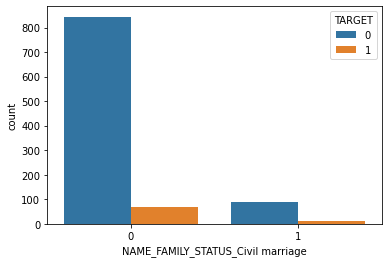

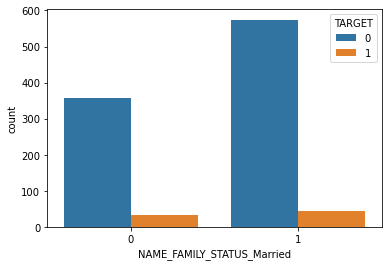

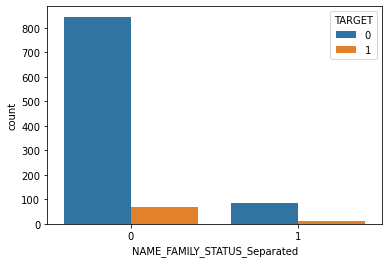

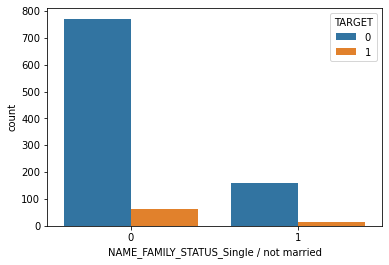

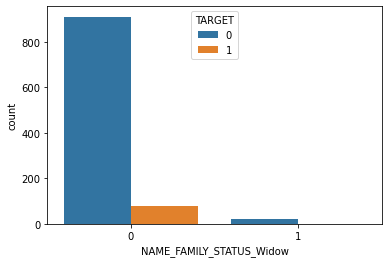

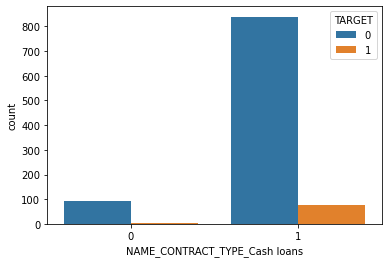

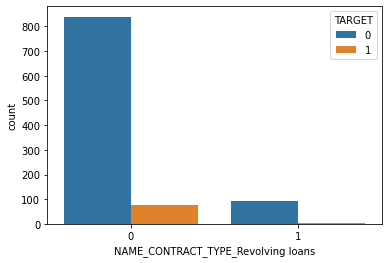

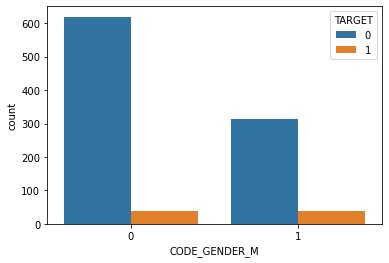

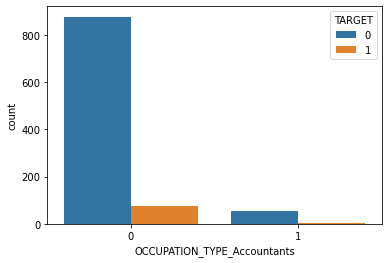

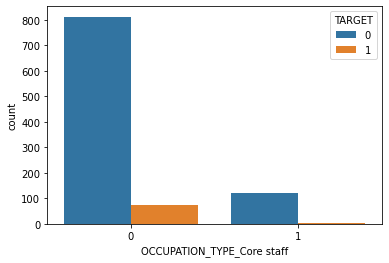

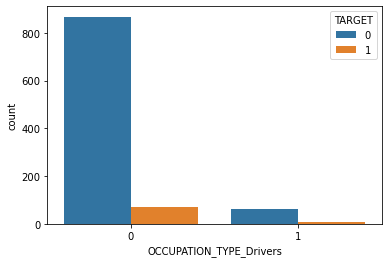

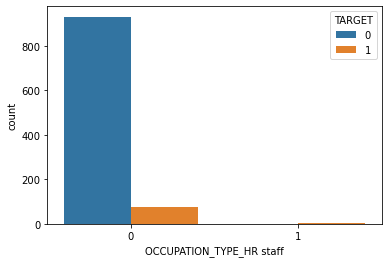

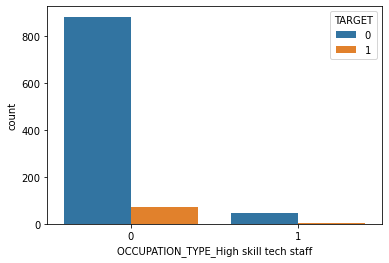

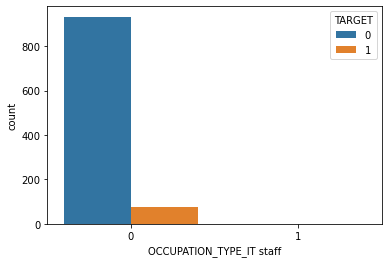

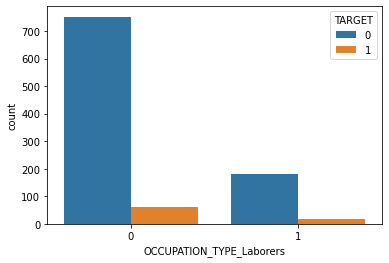

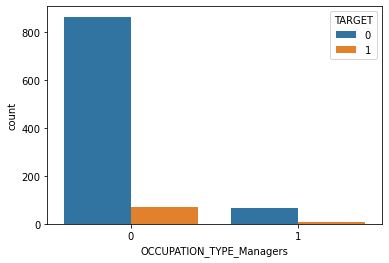

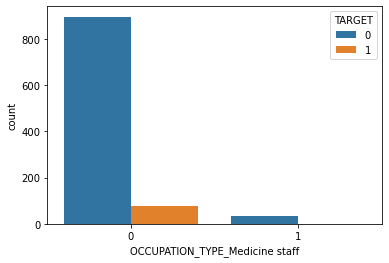

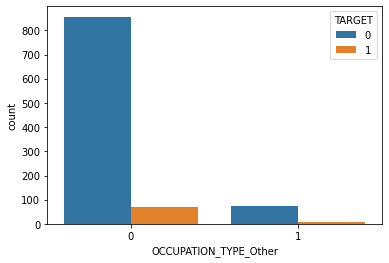

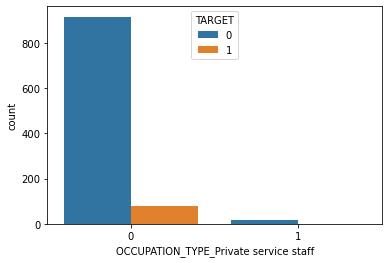

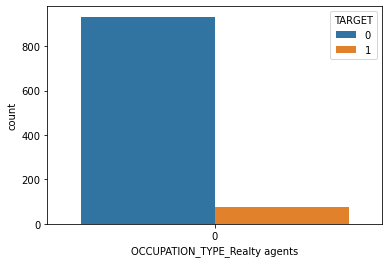

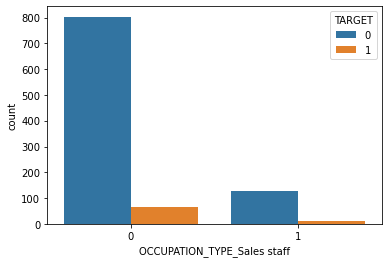

In [7]:
for column in cat:
    sns.countplot(x=column, hue="TARGET", data=df)
    plt.show()

C:\Users\jayse\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


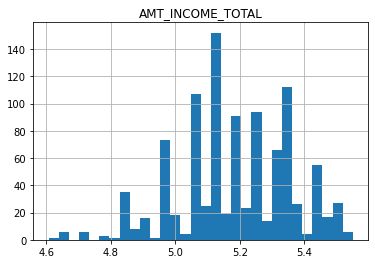

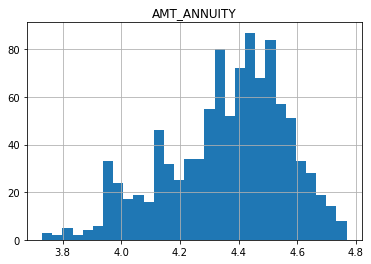

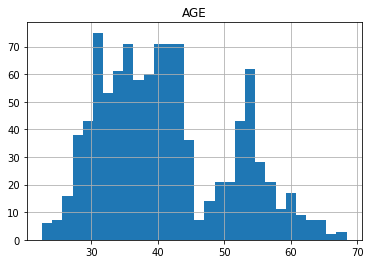

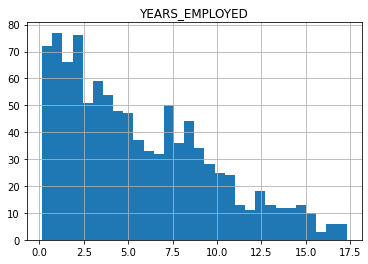

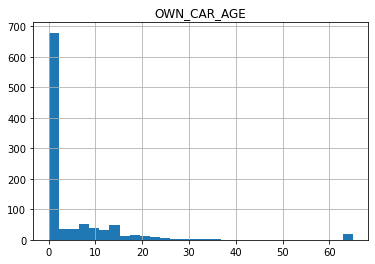

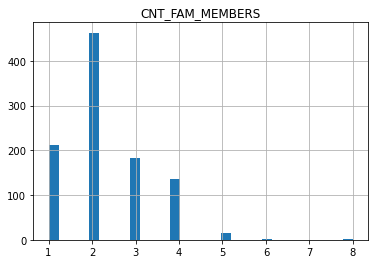

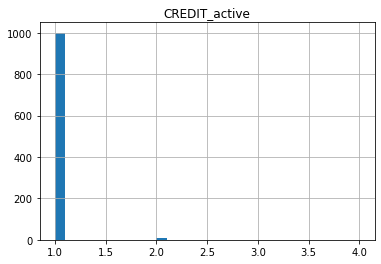

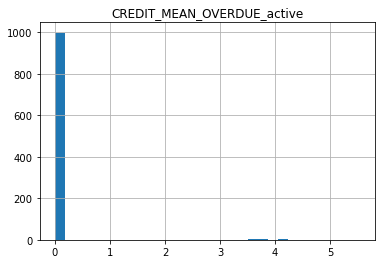

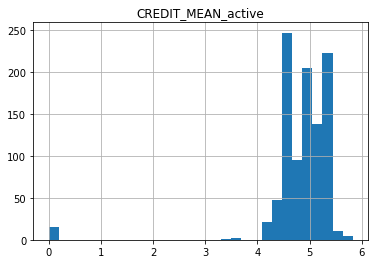

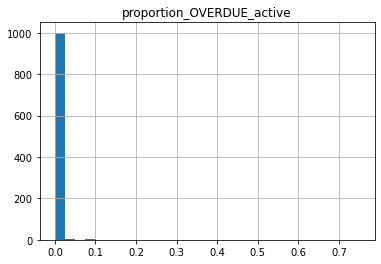

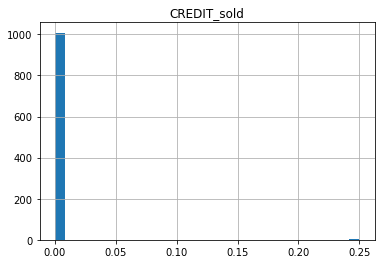

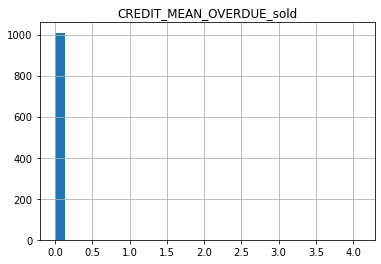

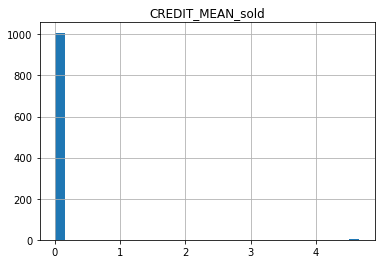

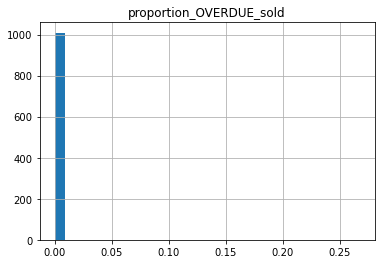

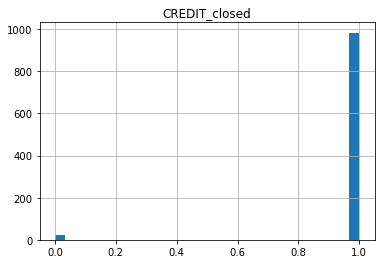

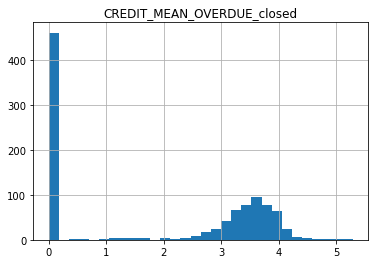

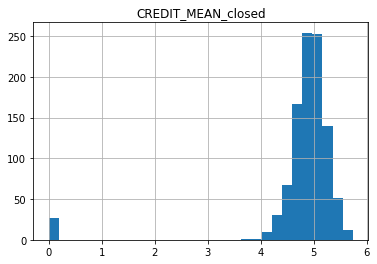

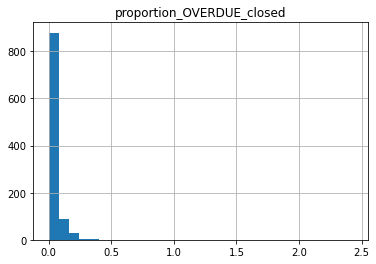

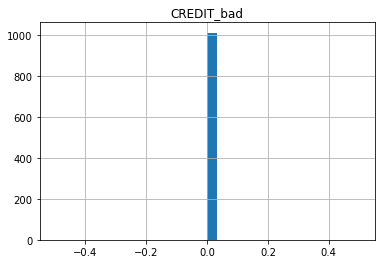

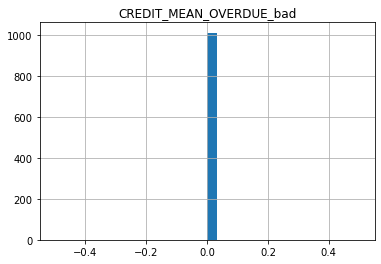

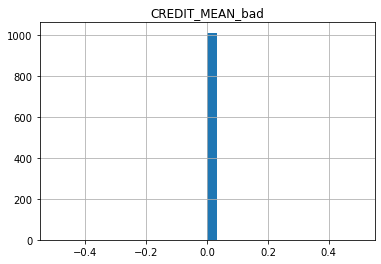

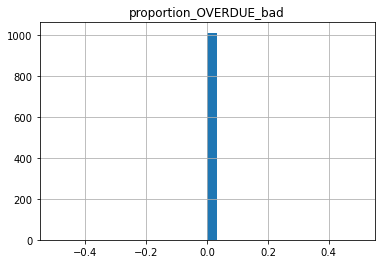

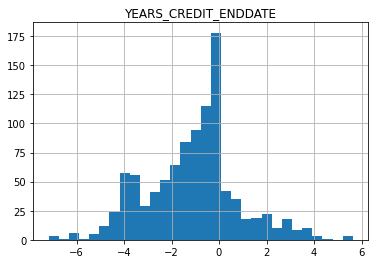

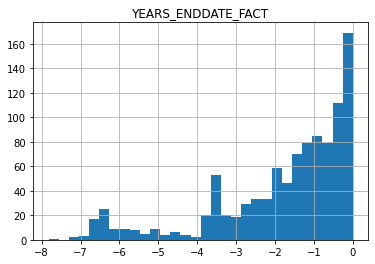

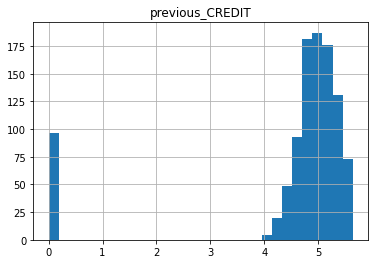

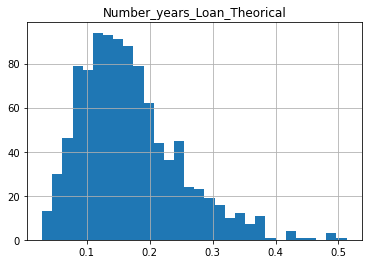

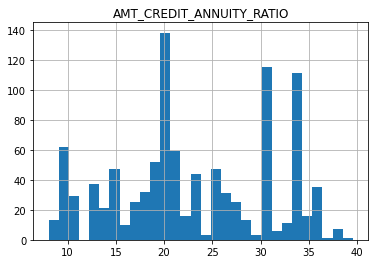

In [8]:
for i in range(len(col)):
    data.hist(col[i], bins = 30)

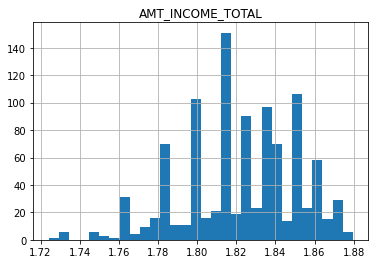

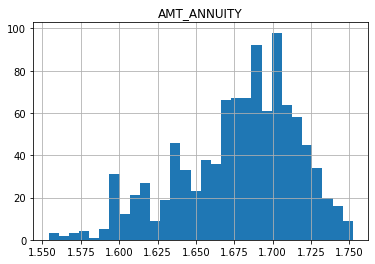

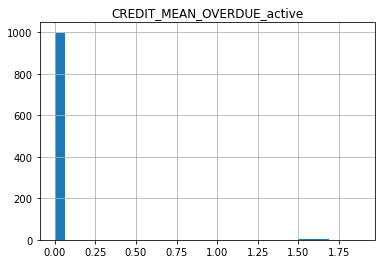

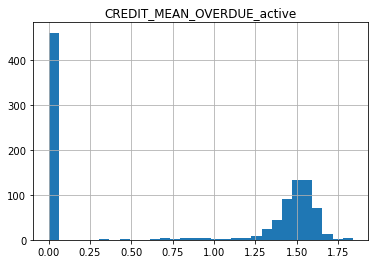

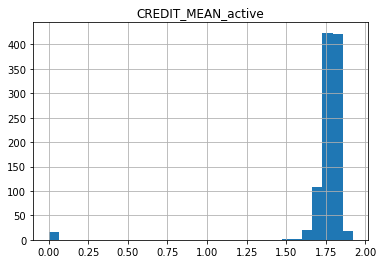

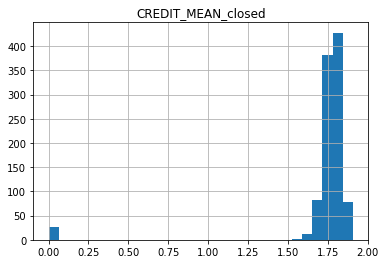

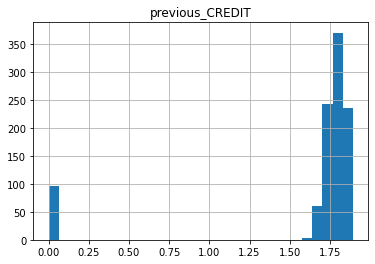

In [9]:
#apply log to flat distribution
np.log(data["AMT_INCOME_TOTAL"]+1).hist(bins = 30)
plt.title("AMT_INCOME_TOTAL")
plt.show()
np.log(data["AMT_ANNUITY"]+1).hist(bins = 30)
plt.title("AMT_ANNUITY")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_active")
plt.show()
np.log(data["CREDIT_MEAN_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_closed")
plt.show()
np.log(data["previous_CREDIT"]+1).hist(bins = 30)
plt.title("previous_CREDIT")
plt.show()

# Correlation matrix

<AxesSubplot:>

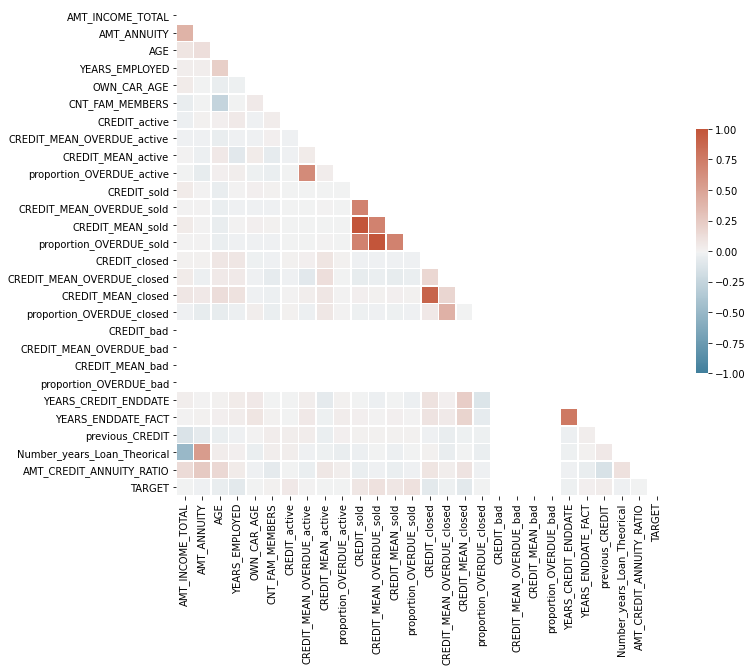

In [10]:
col.append("TARGET")
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising.
TARGET seem not correlated with other features...

# Candidat's sex

In [11]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.66/0.34'

In [12]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.50/0.50'

To avoid any bias due to candidat's sex, **"CODE_GENDER_M"** is removed.

In [13]:
df = df.drop("CODE_GENDER_M", axis = 1)
target = df[["TARGET"]]
data = df.iloc[:,2:]

# Education type

In [14]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [15]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Higher education                 15
NAME_EDUCATION_TYPE_Incomplete higher                 4
NAME_EDUCATION_TYPE_Other                             1
NAME_EDUCATION_TYPE_Secondary / secondary special    58
dtype: int64

<AxesSubplot:ylabel='None'>

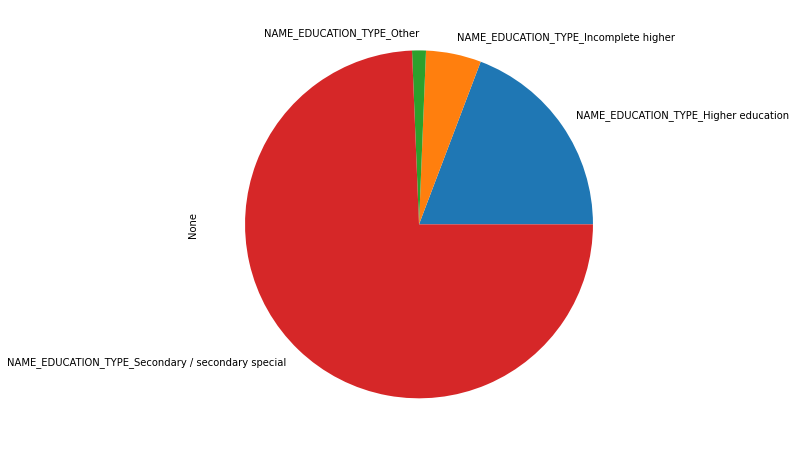

In [16]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [17]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Higher education                 268
NAME_EDUCATION_TYPE_Incomplete higher                 33
NAME_EDUCATION_TYPE_Other                              4
NAME_EDUCATION_TYPE_Secondary / secondary special    627
dtype: int64

<AxesSubplot:ylabel='None'>

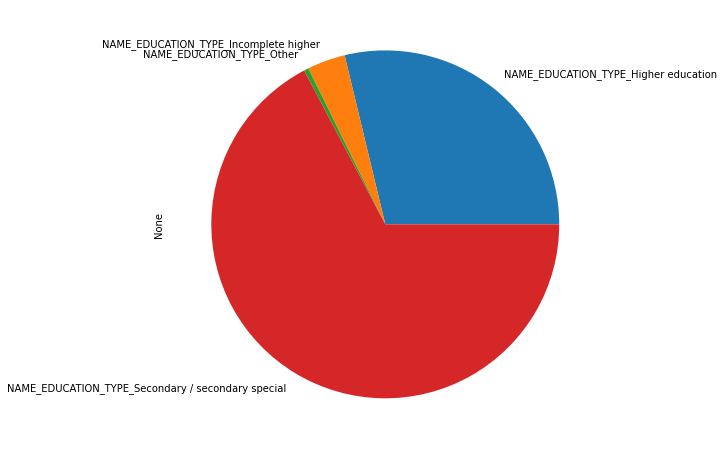

In [18]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [20]:
len("NAME_FAMILY_STATUS")

18

In [21]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [22]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage          10
NAME_FAMILY_STATUS_Married                 44
NAME_FAMILY_STATUS_Separated               10
NAME_FAMILY_STATUS_Single / not married    14
NAME_FAMILY_STATUS_Widow                    0
dtype: int64

<AxesSubplot:ylabel='None'>

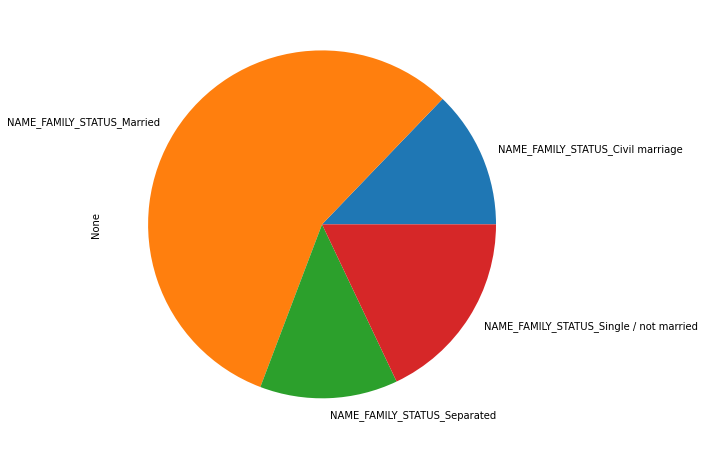

In [23]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [24]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage           88
NAME_FAMILY_STATUS_Married                 574
NAME_FAMILY_STATUS_Separated                87
NAME_FAMILY_STATUS_Single / not married    161
NAME_FAMILY_STATUS_Widow                    22
dtype: int64

<AxesSubplot:ylabel='None'>

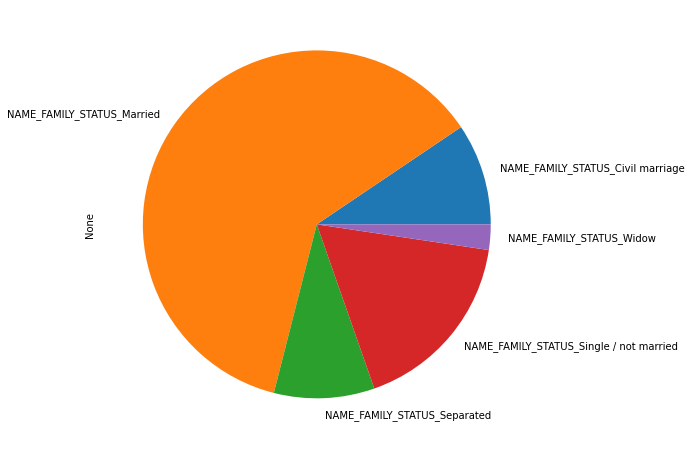

In [25]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Occupation type

In [26]:
len("OCCUPATION_TYPE")

15

In [27]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [28]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               2
OCCUPATION_TYPE_Core staff                3
OCCUPATION_TYPE_Drivers                   8
OCCUPATION_TYPE_HR staff                  2
OCCUPATION_TYPE_High skill tech staff     5
OCCUPATION_TYPE_IT staff                  1
OCCUPATION_TYPE_Laborers                 18
OCCUPATION_TYPE_Managers                  6
OCCUPATION_TYPE_Medicine staff            1
OCCUPATION_TYPE_Other                     8
OCCUPATION_TYPE_Private service staff     0
OCCUPATION_TYPE_Realty agents             0
OCCUPATION_TYPE_Sales staff              11
dtype: int64

In [29]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               56
OCCUPATION_TYPE_Core staff               120
OCCUPATION_TYPE_Drivers                   64
OCCUPATION_TYPE_HR staff                   1
OCCUPATION_TYPE_High skill tech staff     48
OCCUPATION_TYPE_IT staff                   0
OCCUPATION_TYPE_Laborers                 180
OCCUPATION_TYPE_Managers                  67
OCCUPATION_TYPE_Medicine staff            36
OCCUPATION_TYPE_Other                     76
OCCUPATION_TYPE_Private service staff     16
OCCUPATION_TYPE_Realty agents              0
OCCUPATION_TYPE_Sales staff              129
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

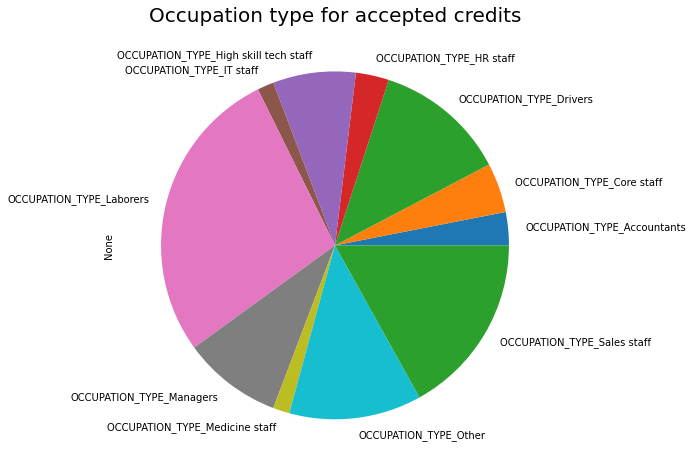

In [30]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

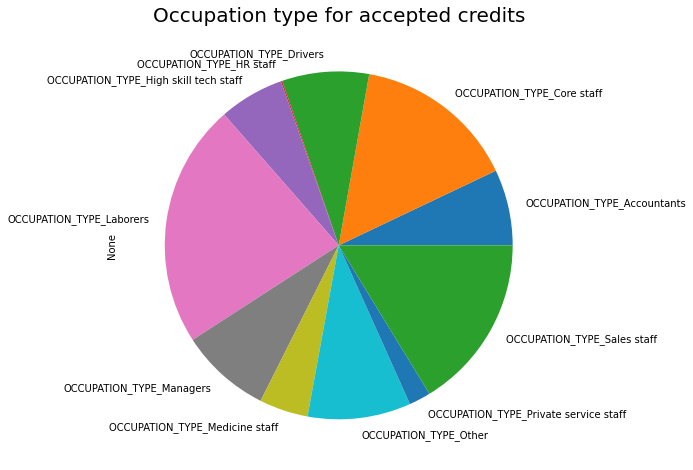

In [31]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Logisitc regression

In [32]:
def score_regression(y_test, y_pred, verbose = True):
    """
    Evaluate prediction by computing sensibility,
    specificity, precision, accurary and F-mesure
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    score = {}
    score["sensibility"] = tp/(tp+fn)
    score["specificity"] = tn/(fp+tn)
    if tp+fp == 0:
        score["precision"] = 0
    else:
        score["precision"] = tp/(tp+fp)
    score["accuracy"] = (tp+tn)/(tn+fn+tp+fp)
    if score["sensibility"] + score["precision"] == 0:
        score["f_mesure"] = 0
    else:
        score["f_mesure"] = 2 * (score["precision"] * score["sensibility"]
        )/(score["sensibility"] + score["precision"])
    if verbose:
        print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
        print("Sensibility (rate of true positif) {0}".format(score["sensibility"]))
        print("Specificity (rate of true negatif) {0:.3f}".format(score["specificity"]))
        if score["precision"] == 0:
            print("Denominator is zero. impossible to compute precision ! Change ratio True and False")
        else:
            print("Precision (proportion of correct prediction of positif) {0:.3f}".format(score["precision"]))
        print("Accurary (proportion of correct prediction) {0:.3f}".format(score["accuracy"]))
        if score["f_mesure"] == 0:
            print("Denominator is zero. impossible to compute F-mesure ! Change ratio True and False\n")
        else:
            print("F-mesure {0:.3f}\n".format(score["f_mesure"]))
    return score

In [45]:
def process_logisitic_reg(X, Y, n_split = 5, display = True):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = None, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        lr = LogisticRegression(C=10, max_iter = 100000, multi_class = 'ovr').fit(X_train, np.ravel(y_train))
        y_pred = lr.predict(X_test)
        mdl.append(lr)
        scores.append(score_regression(y_test, y_pred, display))
    return mdl, scores

In [46]:
data.shape

(1010, 51)

In [47]:
mdl, scores = process_logisitic_reg(data.copy().to_numpy(), target.copy().to_numpy())

TN: 187.0, FP: 0.0, FN: 15.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.926
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

TN: 184.0, FP: 3.0, FN: 15.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 0.984
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.911
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

TN: 186.0, FP: 0.0, FN: 16.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.921
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

## Results

### ROC curve

In [42]:
#take a subset
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
skf.split(X, Y)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


In [43]:
sensibility = []
for i in range(len(scores)):
    sensibility.append((scores[i]["sensibility"]))
indice = np.where(sensibility == np.max(sensibility))[0][0]
best_mdl = mdl[indice]

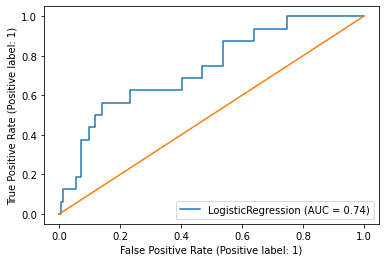

In [44]:
metrics.plot_roc_curve(best_mdl, X_test, y_test)
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()
plt.show()

The logisitic regression model is not effecient to reject bad loan. It can not be used and we must improve it.

In [48]:
tmp = target.sum() / target.shape[0] *100
tmp2 = target.sum() / (target.shape[0]-target.sum()) *100
print("The proportion of True label is {0:.2f}%. It is {1} time less than False.\n\
New datasets are created with less accepted loan.".format(tmp[0], int(tmp2)))

The proportion of True label is 7.72%. It is 8 time less than False.
New datasets are created with less accepted loan.


## New dataset

The number of rejected loan is low compared to accepted loan. Moreover feature are quite equilibrate beetween 2 labels.
True label are increased with data augmentation (adding noises). To be sure there is no overfitting, an unbiased sample will be used. 

In [49]:
def add_noise(X, shape = None, dispersion = 1):
    """
    Generate new samples and add to data given.
    Samples generated follow distribution center to X's mean
    with X's standard deviation
    Arguments:
        _X array
        _Data dimension (which dimension)
        _dispersion: factor to scale standard deviation
    Return
        Array with new data
    """
    std = np.std(X, axis = 0)/dispersion
    means = np.mean(X, axis = 0)
    if shape is None:
        lines = np.shape(X)[0]
        col = np.shape(X)[1]
        Xnoisy =  np.zeros((lines, col))
    else:
        Xnoisy =  np.zeros((shape[0], shape[1]))
    for i in range(np.shape(X)[1]):
        noise = np.random.normal(loc=means[i], scale=std[i], size = np.shape(Xnoisy)[0])
        ##convert to int for boolen features
        #Xnoisy[:,i] += noise.astype(int)
        Xnoisy[:,i] += noise
    return Xnoisy

In [50]:
def best_score_model(mdl, scores, metric = "f_mesure"):
    tmp = []
    for i in range(len(scores)):
        tmp.append(scores[i][metric])
    indice = np.where(tmp == np.max(tmp))[0][0]
    return mdl[i], scores[i]

# Training and test dataset

In [51]:
def ratio_false_true(Y, label = 1, ratio = 2):
    """
    For binomila data. Split label 1/0
    and return indice in way that 1/0 has a specific ratio.
    Arguments:
        Y: list of binomial data
        label: label to use (default 1)
        ratio: ratio value between number of 0 and number of 1
        number(0)/number(1)
    Return:
        indices of keep elements
    """
    indice_true = np.where(Y == label)[0]
    indice_false = np.setdiff1d(np.arange(len(Y)), indice_true)
    new_indice_false = np.random.choice(indice_false, int(len(indice_true) * ratio), replace = False)
    indices = np.concatenate([indice_true, new_indice_false])
    return np.sort(indices)

### No data augmentation

Create a Test validation by taking off 20% of label True and False

In [52]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

Compare data with no data augmentation vs data augmentation. For both case, ratio **True**/**False** = 2

In [53]:
ind = ratio_false_true(Ytrain, label = 1, ratio = 1)
newXtrain = Xtrain[ind]
newYtrain = Ytrain[ind]

In [54]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(newXtrain, newYtrain):
    x_train, x_val = newXtrain[train_index], newXtrain[test_index]
    y_train, y_val = newYtrain[train_index], newYtrain[test_index]
    lr = LogisticRegression(C=10, max_iter = 500000).fit(x_train, np.ravel(y_train))
    y_pred = lr.predict(Xtest)
    mdl.append(lr)
    scores.append(score_regression(Ytest, y_pred, verbose = True))
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")

TN: 134.0, FP: 146.0, FN: 11.0, TP: 12.0
Sensibility (rate of true positif) 0.5217391304347826
Specificity (rate of true negatif) 0.479
Precision (proportion of correct prediction of positif) 0.076
Accurary (proportion of correct prediction) 0.482
F-mesure 0.133

TN: 137.0, FP: 143.0, FN: 14.0, TP: 9.0
Sensibility (rate of true positif) 0.391304347826087
Specificity (rate of true negatif) 0.489
Precision (proportion of correct prediction of positif) 0.059
Accurary (proportion of correct prediction) 0.482
F-mesure 0.103

TN: 137.0, FP: 143.0, FN: 15.0, TP: 8.0
Sensibility (rate of true positif) 0.34782608695652173
Specificity (rate of true negatif) 0.489
Precision (proportion of correct prediction of positif) 0.053
Accurary (proportion of correct prediction) 0.479
F-mesure 0.092

TN: 153.0, FP: 127.0, FN: 15.0, TP: 8.0
Sensibility (rate of true positif) 0.34782608695652173
Specificity (rate of true negatif) 0.546
Precision (proportion of correct prediction of positif) 0.059
Accurary (pr

## Data augmentation

In [55]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [56]:
#features with 2 classes
feat = []
for cpt, col in enumerate(data.columns):
    count = data[col].nunique()
    if count == 2:
        feat.append(cpt)

In [57]:
indices_true = np.where(Ytrain == 1)[0]
indices_false = np.arange(0, len(Ytrain))
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)

In [58]:
#create noisy data
lines = np.shape(Xtrain)[0]
col = np.shape(Xtrain)[1]
Xtrain_noise = add_noise(Xtrain[indices_true], shape = [lines, col], dispersion = 1.2)
for col in feat:
    Xtrain_noise[:, col] = Xtrain_noise[:, col].astype(int)

In [59]:
Xnoisy = np.concatenate((Xtrain[indices_true], Xtrain_noise))
Ynoisy_true = np.ones(len(Xnoisy))
Ynoisy_false = np.zeros(len(indices_false))
Ynoisy = np.concatenate((Ynoisy_true, Ynoisy_false))
Xnoisy = np.concatenate((Xnoisy, Xtrain[indices_false]))
ind = np.arange(len(Xnoisy))
np.random.shuffle(ind)
Xnoisy = Xnoisy[ind]
Ynoisy = Ynoisy[ind]

In [60]:
ind = ratio_false_true(Ynoisy, label = 1, ratio = 0.5)
newXtrain = Xnoisy[ind]
newYtrain = Ynoisy[ind]

In [61]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(newXtrain, newYtrain):
    x_train, x_val = newXtrain[train_index], newXtrain[test_index]
    y_train, y_val = newYtrain[train_index], newYtrain[test_index]
    lr = LogisticRegression(C=10, max_iter = 500000).fit(x_train, np.ravel(y_train))
    y_pred = lr.predict(Xtest)
    mdl.append(lr)
    scores.append(score_regression(Ytest, y_pred, verbose = True))
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")

TN: 272.0, FP: 8.0, FN: 22.0, TP: 1.0
Sensibility (rate of true positif) 0.043478260869565216
Specificity (rate of true negatif) 0.971
Precision (proportion of correct prediction of positif) 0.111
Accurary (proportion of correct prediction) 0.901
F-mesure 0.062

TN: 271.0, FP: 9.0, FN: 21.0, TP: 2.0
Sensibility (rate of true positif) 0.08695652173913043
Specificity (rate of true negatif) 0.968
Precision (proportion of correct prediction of positif) 0.182
Accurary (proportion of correct prediction) 0.901
F-mesure 0.118

TN: 272.0, FP: 8.0, FN: 21.0, TP: 2.0
Sensibility (rate of true positif) 0.08695652173913043
Specificity (rate of true negatif) 0.971
Precision (proportion of correct prediction of positif) 0.200
Accurary (proportion of correct prediction) 0.904
F-mesure 0.121

TN: 268.0, FP: 12.0, FN: 21.0, TP: 2.0
Sensibility (rate of true positif) 0.08695652173913043
Specificity (rate of true negatif) 0.957
Precision (proportion of correct prediction of positif) 0.143
Accurary (propor

## lightGBM (Light Gradient Boosting Machine)

### LGBMClassifier

In [62]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [63]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
feature_imp = np.zeros(x_train.shape[1])

scores = []
flag = True
for train_index, test_index in skf.split(Xtrain, Ytrain):
    x_train, x_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = Ytrain[train_index], Ytrain[test_index]
    model = lgb.LGBMClassifier(objective='binary', boosting_type='goss', n_estimators=10000, class_weight='balanced')
    model.fit(x_train, y_train, early_stopping_rounds=200, eval_set = [(x_val, y_val)], eval_metric = ['auc', 'loss'], verbose = 200)
    if flag:
        df_feature_importance = pd.DataFrame({ 'feature': data.columns.to_numpy(),
        'importance': model.feature_importances_,})
        flag = False
    else:
        df_feature_importance['importance'] += model.feature_importances_

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.7127	valid_0's binary_logloss: 0.304678
Early stopping, best iteration is:
[27]	valid_0's auc: 0.743928	valid_0's binary_logloss: 0.431322
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.44136	valid_0's binary_logloss: 0.443802
Early stopping, best iteration is:
[6]	valid_0's auc: 0.512144	valid_0's binary_logloss: 0.548061
Training until validation scores don't improve for 200 rounds


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[200]	valid_0's auc: 0.651748	valid_0's binary_logloss: 0.319712
Early stopping, best iteration is:
[66]	valid_0's auc: 0.708392	valid_0's binary_logloss: 0.334414
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.569231	valid_0's binary_logloss: 0.360999
Early stopping, best iteration is:
[12]	valid_0's auc: 0.646853	valid_0's binary_logloss: 0.452697
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.496503	valid_0's binary_logloss: 0.366092
Early stopping, best iteration is:
[164]	valid_0's auc: 0.491608	valid_0's binary_logloss: 0.360272
Wall time: 535 ms


C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Features qui contribuent le plus

In [65]:
df_feature_importance.sort_values('importance', ascending=False)

,feature,importance
3,YEARS_EMPLOYED,217
48,previous_CREDIT,211
1,AMT_ANNUITY,210
47,YEARS_ENDDATE_FACT,209
46,YEARS_CREDIT_ENDDATE,201
2,AGE,185
50,AMT_CREDIT_ANNUITY_RATIO,170
32,CREDIT_MEAN_active,170
49,Number_years_Loan_Theorical,158
40,CREDIT_MEAN_closed,158


In [66]:
feat = []
tot = df_feature_importance['importance'].sum()
for cpt, val in enumerate(df_feature_importance['importance']):
    if tot * 0.01 <= val:
        feat.append(df_feature_importance.iloc[cpt,0])

In [67]:
X = data[feat].copy().to_numpy()
Y = target.copy().to_numpy()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
feature_imp = np.zeros(x_train.shape[1])

scores = []
flag = True
df_feature_importance
for train_index, test_index in skf.split(Xtrain, Ytrain):
    x_train, x_val = Xtrain[train_index], Xtrain[test_index]
    y_train, y_val = Ytrain[train_index], Ytrain[test_index]
    model = lgb.LGBMClassifier(objective='binary', boosting_type='goss', n_estimators=10000, class_weight='balanced')
    model.fit(x_train, y_train, early_stopping_rounds=200, eval_set = [(x_val, y_val)], eval_metric = ['auc', 'loss'], verbose = 200)
    if flag:
        df_feature_importance = pd.DataFrame({ 'feature': data[feat].columns.to_numpy(),
        'importance': model.feature_importances_,})
        flag = False
    else:
        df_feature_importance['importance'] += model.feature_importances_

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.580153	valid_0's binary_logloss: 0.345996
Early stopping, best iteration is:
[3]	valid_0's auc: 0.757807	valid_0's binary_logloss: 0.602891
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.480916	valid_0's binary_logloss: 0.444223
Early stopping, best iteration is:
[11]	valid_0's auc: 0.564192	valid_0's binary_logloss: 0.483187
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.734965	valid_0's binary_logloss: 0.276393
Early stopping, best iteration is:
[198]	valid_0's auc: 0.732168	valid_0's binary_logloss: 0.275023
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.551049	valid_0's binary_logloss: 0.355347
Early stopping, best iteration is:
[34]	valid_0's auc: 0.638462	valid_0's binary_logloss: 0.400181
Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.52028	valid

C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jayse\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Feature importance

In [68]:
df_feature_importance.sort_values('importance', ascending=False)

,feature,importance
3,YEARS_EMPLOYED,199
2,AGE,190
1,AMT_ANNUITY,185
13,previous_CREDIT,184
15,AMT_CREDIT_ANNUITY_RATIO,170
11,YEARS_CREDIT_ENDDATE,166
12,YEARS_ENDDATE_FACT,164
14,Number_years_Loan_Theorical,159
7,CREDIT_MEAN_active,146
0,AMT_INCOME_TOTAL,139


In [69]:
df_feature_importance

,feature,importance
0,AMT_INCOME_TOTAL,139
1,AMT_ANNUITY,185
2,AGE,190
3,YEARS_EMPLOYED,199
4,OWN_CAR_AGE,29
5,CNT_FAM_MEMBERS,14
6,NAME_FAMILY_STATUS_Married,26
7,CREDIT_MEAN_active,146
8,CREDIT_MEAN_OVERDUE_closed,71
9,CREDIT_MEAN_closed,127


In [ ]:
pickle.dump(model, open("tree_decision", 'wb'))

In [ ]:
data[["CREDIT_active"]]